# Step 1: Load the Data
This loads yf data and then drops NaN values. Then, using the TA library we calculate all the technical indicators.

Note: the dip and din indicators show errors because there is division involving 0. We ignore this because we do not ultimately use dip or din


In [2]:
import yfinance as yf
import datetime
from ta import add_all_ta_features
import pandas as pd

# Define the ticker symbol
tickerSymbol = '^GSPC'  # symbol for S&P 500

# Get data from 50 years ago to today
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=50*365)

# Get the data
tickerData = yf.Ticker(tickerSymbol)
data = tickerData.history(period='1d', start=start_date, end=end_date)

# Clean NaN values
data = data.dropna()

# Add all ta features
data = add_all_ta_features(
    data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

/Users/zacharyzhang04/opt/anaconda3/envs/trading/lib/python3.11/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/Users/zacharyzhang04/opt/anaconda3/envs/trading/lib/python3.11/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [4]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,volume_adi,volume_obv,volume_cmf,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
1973-07-03 00:00:00-04:00,0.0,103.019997,101.139999,101.870003,10560000,0.0,0.0,-2.359099e+06,10560000,-0.223400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.870003,-90.580453,0.000000,0.000000
1973-07-05 00:00:00-04:00,0.0,102.480003,100.800003,101.779999,10500000,0.0,0.0,-6.091549e+05,60000,-0.028925,...,-0.007048,-0.001410,-0.005639,-0.045344,-0.009069,-0.036275,101.832018,-0.088352,-0.088391,-0.088352
1973-07-06 00:00:00-04:00,0.0,102.220001,100.669998,101.279999,9980000,0.0,0.0,-2.733937e+06,-9920000,-0.088078,...,-0.051669,-0.011462,-0.040207,-0.475255,-0.102306,-0.372949,101.596376,-0.491256,-0.492466,-0.579173
1973-07-09 00:00:00-04:00,0.0,102.449997,100.440002,102.139999,11560000,0.0,0.0,5.260311e+06,1640000,0.123481,...,-0.018655,-0.012900,-0.005754,0.389510,-0.003943,0.393453,101.828756,0.849132,0.845547,0.265040
1973-07-10 00:00:00-04:00,0.0,104.199997,102.260002,103.519997,15090000,0.0,0.0,9.771721e+06,16730000,0.169383,...,0.115366,0.012753,0.102613,3.605350,0.717916,2.887434,102.563341,1.351084,1.342038,1.619705


In [2]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimok

(12601, 93)

# Step 2: Feature Selection! Exciting!

(no im jk this part boring as shit)


In [3]:
import sklearn
print(sklearn.__version__)

1.2.2


First, I fix a strategy where I take profit at 2.5 percent after 5 days, or stop loss at 1 percent decrease.

In [4]:
data = pd.read_csv('my_dataframe.csv')

In [5]:
data["Target"].value_counts()

Target
 0.0    13524
-1.0     4422
 1.0     1415
Name: count, dtype: int64

In [222]:
'''import numpy as np
import pandas as pd

def calculate_target(data, stop_loss_level, take_profit_level, max_hold_days):
    # Initialize a new column
    data['Target'] = 0
    
    for i in range(len(data) - max_hold_days - 1):
        buy_price = data.iloc[i, data.columns.get_loc('Close')]
        stop_loss_price = buy_price * (1 - stop_loss_level)
        take_profit_price = buy_price * (1 + take_profit_level)

        # Loop over the holding period
        for j in range(i, i+max_hold_days):
            price = data.iloc[j, data.columns.get_loc('Close')]
            
            # Check if we hit the stop-loss level
            if price <= stop_loss_price:
                # SELL OR SHORT DAY
                data.iloc[i, data.columns.get_loc('Target')] = -1
                break
            # Check if we hit the take-profit level
            elif price >= take_profit_price:
                # BUY DAY
                data.iloc[i, data.columns.get_loc('Target')] = 1
                break
        else: # DON'T BUY DAY
            data.at[i, 'Target'] = 0

# Call the function
calculate_target(data, 0.01, 0.025, 5)'''

"import numpy as np\nimport pandas as pd\n\ndef calculate_target(data, stop_loss_level, take_profit_level, max_hold_days):\n    # Initialize a new column\n    data['Target'] = 0\n    \n    for i in range(len(data) - max_hold_days - 1):\n        buy_price = data.iloc[i, data.columns.get_loc('Close')]\n        stop_loss_price = buy_price * (1 - stop_loss_level)\n        take_profit_price = buy_price * (1 + take_profit_level)\n\n        # Loop over the holding period\n        for j in range(i, i+max_hold_days):\n            price = data.iloc[j, data.columns.get_loc('Close')]\n            \n            # Check if we hit the stop-loss level\n            if price <= stop_loss_price:\n                # SELL OR SHORT DAY\n                data.iloc[i, data.columns.get_loc('Target')] = -1\n                break\n            # Check if we hit the take-profit level\n            elif price >= take_profit_price:\n                # BUY DAY\n                data.iloc[i, data.columns.get_loc('Target')]

In [6]:
count_zeros = data['Target'].value_counts()[0]
count_pos = data['Target'].value_counts()[1]
count_neg = data['Target'].value_counts()[-1]
print("ZEROS: ", count_zeros, "\nPOSITIVES: ", count_pos, "\nNEGATIVES", count_neg)

ZEROS:  13524 
POSITIVES:  1415 
NEGATIVES 4422


The strategy above doesn't really work. It only has 1000 "buy" days and 45000 "don't buy" days, so we won't be in the market for long enough to beat S&P. Therefore, in addition to the 'Target' column we just created, we will also calculate a day-by-day change (as a percentage of the previous day's price) as follows:

In [224]:
# # Shift the closing prices 1 day into the future
# data['Next Day Close'] = data['Close'].shift(-1)

# # Calculate the next day's closing price as a percentage of the current day's closing price
# data['Next Day Close %'] = data['Close'].pct_change(-1)

In [225]:
# # Saving the data to CSV so you don't have to calculate those stupid things next time GG no re
# data.to_csv('my_dataframe.csv', index=False)

In [7]:
num_negative_entries = (data['Next Day Close %'] < 0.0).sum()

print(f'The number of negative entries in "Next Day Close %" is: {num_negative_entries}')

num_positive_entries = (data['Next Day Close %'] > 0.0).sum()

print(f'The number of positive entries in "Next Day Close %" is: {num_positive_entries}')

num_zero_entries = (data['Next Day Close %'] == 0.0).sum()

print(f'The number of zero entries in "Next Day Close %" is: {num_zero_entries}')

The number of negative entries in "Next Day Close %" is: 6662
The number of positive entries in "Next Day Close %" is: 5915
The number of zero entries in "Next Day Close %" is: 6783


Choose the number of features

In [27]:
num_features = 25

In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
data = data.head(12603)
# Select features
feature_cols = [col for col in data.columns if col != 'Target' and col != 'Next Day Close' and col != 'Next Day Close %']
X = data[feature_cols]
y = data['Target']

# Drop NaN values
nan_mask = X.isna().any(axis=1)
X = X.dropna()
y = y[~nan_mask]

# Select the 5 best features
selector = SelectKBest(f_classif, k=num_features)
selector.fit(X, y)

# Print the names of the most important features
feature_columns = []
for feature_list_index in selector.get_support(indices=True):
    feature_columns.append(feature_cols[feature_list_index])
feature_columns

/Users/zacharyzhang04/opt/anaconda3/envs/trading/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [5 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/zacharyzhang04/opt/anaconda3/envs/trading/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


['volume_sma_em',
 'volatility_bbw',
 'volatility_bbp',
 'volatility_kcw',
 'volatility_kcp',
 'volatility_dcw',
 'volatility_dcp',
 'volatility_ui',
 'trend_macd',
 'trend_macd_signal',
 'trend_vortex_ind_pos',
 'trend_vortex_ind_neg',
 'trend_vortex_ind_diff',
 'trend_adx_neg',
 'trend_cci',
 'momentum_rsi',
 'momentum_tsi',
 'momentum_uo',
 'momentum_stoch',
 'momentum_stoch_signal',
 'momentum_wr',
 'momentum_ao',
 'momentum_roc',
 'momentum_ppo',
 'momentum_ppo_signal']

In [31]:
redundant = set()
for i in range(num_features):
    for j in range(i+1, num_features):
        if abs(data[feature_columns[i]].corr(data[feature_columns[j]])) > 0.8:
            if i+1 not in redundant:
                redundant.add(j+1)
print(num_features - len(redundant))
            
        

11


In [228]:
data[feature_columns].head(20)

,volatility_bbw,volatility_kcw,volatility_dcw,volatility_ui,momentum_rsi
0,0.000000,3.814205,1.900848,0.000000,100.000000
1,0.823164,3.458518,2.029196,0.000000,0.000000
2,2.935770,3.379214,2.751323,0.000000,0.000000
3,4.319935,3.454799,4.022047,0.000000,0.000000
4,4.645643,3.425111,4.364694,0.000000,0.000000
5,5.005711,3.364703,4.504042,0.000000,0.000000
6,4.724166,3.448034,4.732099,0.000000,24.331353
7,4.538155,3.486629,4.727397,0.000000,46.729685
8,5.613742,3.645329,5.594455,0.000000,65.106958
9,5.979346,3.706739,5.978293,0.000000,62.072579


# TIME FOR THE MODEL
(uh oh...)

In [229]:
data = data.head(12603)
data["Target"].value_counts()

Target
 0.0    6766
-1.0    4422
 1.0    1415
Name: count, dtype: int64

In [32]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,volume_adi,volume_obv,volume_cmf,...,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,Target,Next Day Close,Next Day Close %
0,0.0,105.169998,103.180000,104.690002,12760000.0,0.0,0.0,6.604470e+06,12760000.0,0.517592,...,0.000000,0.000000,0.000000,104.690002,-90.312897,0.000000,0.000000,-1.0,104.260002,0.004124
1,0.0,105.300003,103.680000,104.260002,10770000.0,0.0,0.0,3.546333e+06,1990000.0,0.150715,...,-1.258634,-0.251727,-1.006908,104.510845,-0.410737,-0.411583,-0.410737,-1.0,102.900002,0.013217
2,0.0,104.099998,102.440002,102.900002,9830000.0,0.0,0.0,-8.357126e+05,-7840000.0,-0.025051,...,-2.871864,-0.775754,-2.096110,103.836763,-1.304432,-1.313014,-1.709811,-1.0,101.870003,0.010111
3,0.0,103.019997,101.139999,101.870003,10560000.0,0.0,0.0,-3.194812e+06,-18400000.0,-0.072742,...,-3.657623,-1.352128,-2.305495,103.019508,-1.000971,-1.006014,-2.693667,0.0,101.779999,0.000884
4,0.0,102.480003,100.800003,101.779999,10500000.0,0.0,0.0,-1.444867e+06,-28900000.0,-0.026550,...,-4.291339,-1.939970,-2.351369,102.498555,-0.088352,-0.088391,-2.779639,1.0,101.279999,0.004937


In [230]:
data['Target2'] = data['Target'].replace(-1, 0)
data["Target2"].value_counts()

Target2
0.0    11188
1.0     1415
Name: count, dtype: int64

# Random Forest Model (very L ngl...)

In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Prepare the data
target_column = 'Target2'
feature_columns = ['volatility_bbw', 'volatility_kcw', 'volatility_dcw', 'volatility_ui', 'momentum_rsi']

# Extract target variable and feature columns
target = data[target_column]
features = data[feature_columns]

# Handle NaN values
features = features.fillna(features.mean())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Reshape the input data for Random Forest Classifier
X_train_resampled = X_train_resampled.values.reshape(-1, len(feature_columns))
X_test = X_test.values.reshape(-1, len(feature_columns))

# Train your model on the resampled data
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, predictions)
confusion_matrix = confusion_matrix(y_test, predictions)
classification_report = classification_report(y_test, predictions)

print("Test Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix)
print("Classification Report:")
print(classification_report)


Test Accuracy: 0.8389527965093218
Confusion Matrix:
[[1971  266]
 [ 140  144]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91      2237
         1.0       0.35      0.51      0.41       284

    accuracy                           0.84      2521
   macro avg       0.64      0.69      0.66      2521
weighted avg       0.87      0.84      0.85      2521



In [232]:
data["Target2"].value_counts()

Target2
0.0    11188
1.0     1415
Name: count, dtype: int64

In [233]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,volume_adi,volume_obv,volume_cmf,...,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,Target,Next Day Close,Next Day Close %,Target2
0,0.0,105.169998,103.180000,104.690002,12760000.0,0.0,0.0,6.604470e+06,12760000.0,0.517592,...,0.000000,0.000000,104.690002,-90.312897,0.000000,0.000000,-1.0,104.260002,0.004124,0.0
1,0.0,105.300003,103.680000,104.260002,10770000.0,0.0,0.0,3.546333e+06,1990000.0,0.150715,...,-0.251727,-1.006908,104.510845,-0.410737,-0.411583,-0.410737,-1.0,102.900002,0.013217,0.0
2,0.0,104.099998,102.440002,102.900002,9830000.0,0.0,0.0,-8.357126e+05,-7840000.0,-0.025051,...,-0.775754,-2.096110,103.836763,-1.304432,-1.313014,-1.709811,-1.0,101.870003,0.010111,0.0
3,0.0,103.019997,101.139999,101.870003,10560000.0,0.0,0.0,-3.194812e+06,-18400000.0,-0.072742,...,-1.352128,-2.305495,103.019508,-1.000971,-1.006014,-2.693667,0.0,101.779999,0.000884,0.0
4,0.0,102.480003,100.800003,101.779999,10500000.0,0.0,0.0,-1.444867e+06,-28900000.0,-0.026550,...,-1.939970,-2.351369,102.498555,-0.088352,-0.088391,-2.779639,1.0,101.279999,0.004937,1.0


# RNN Model with LSTM Model

In [247]:
'''from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the data
target_column = 'Target2'
feature_columns = ['volatility_bbw', 'volatility_kcw', 'volatility_dcw', 'volatility_ui', 'momentum_rsi']

target = data[target_column]
features = data[feature_columns]

# Handle NaN values
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Reshape the input data for LSTM
X_train_lstm = np.reshape(X_train_resampled, (X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, X_train_resampled.shape[1])))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train_resampled, epochs=10, batch_size=32, verbose=0)

# Make predictions using the LSTM model
lstm_predictions = lstm_model.predict(X_test_lstm)

# Convert the predictions to binary values
lstm_predictions = np.round(lstm_predictions).flatten()

# Evaluate the LSTM model
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
lstm_cm = confusion_matrix(y_test, lstm_predictions)
lstm_classification_report = classification_report(y_test, lstm_predictions)

print("LSTM Test Accuracy:", lstm_accuracy)
print("LSTM Confusion Matrix:")
print(lstm_cm)
print("LSTM Classification Report:")
print(lstm_classification_report)'''

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the data
target_column = 'Target2'
feature_columns = ['volatility_bbw', 'volatility_kcw', 'volatility_dcw', 'volatility_ui', 'momentum_rsi']

target = data[target_column]
features = data[feature_columns]

# Handle NaN values
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Reshape the input data for RNN
X_train_rnn = np.reshape(X_train_resampled, (X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(1, X_train_resampled.shape[1])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_model.fit(X_train_rnn, y_train_resampled, epochs=10, batch_size=32, verbose=0)

# Make predictions using the RNN model
rnn_predictions = rnn_model.predict(X_test_rnn)

# Convert the predictions to binary values
rnn_predictions = np.round(rnn_predictions).flatten()

# Evaluate the RNN model
rnn_accuracy = accuracy_score(y_test, rnn_predictions)
rnn_cm = confusion_matrix(y_test, rnn_predictions)
rnn_classification_report = classification_report(y_test, rnn_predictions)

print("RNN Test Accuracy:", rnn_accuracy)
print("RNN Confusion Matrix:")
print(rnn_cm)
print("RNN Classification Report:")
print(rnn_classification_report)



79/79 [==============================] - 0s 739us/step
RNN Test Accuracy: 0.6180087266957557
RNN Confusion Matrix:
[[1346  891]
 [  72  212]]
RNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.60      0.74      2237
         1.0       0.19      0.75      0.31       284

    accuracy                           0.62      2521
   macro avg       0.57      0.67      0.52      2521
weighted avg       0.86      0.62      0.69      2521



# Save my model (you can use it to backtest in QuantConnect)
CAREFUL: Make sure to not backtest before 2013 ish because that's where the 80 percent training portion ends

In [235]:
# import pickle

# # Save the trained model
# with open('rnn.pkl', 'wb') as f:
#     pickle.dump(lstm_model, f)

In [236]:
alpha_key = "283TNHSOULMEGS79"

In [237]:
'''import requests
import pandas as pd

# Set your Alpha Vantage API key
api_key = alpha_key

# Set the symbol for the desired security (e.g., SPY)
symbol = 'SPY'

# Set the start and end dates
start_date = '2018-01-01'
end_date = '2023-06-15'

# Construct the API URL
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&outputsize=full&apikey={api_key}'

# Send the API request and retrieve the response
response = requests.get(url)
data = response.json()
print(data)
time_series = data['Time Series (Daily)']

# Convert the time series data to a DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index')
df = df.astype(float)

# Sort the DataFrame by date
df = df.sort_index()

# Print the DataFrame
print(df)'''
backtest_data = pd.read_csv('data.csv')

In [238]:
backtest_data.head()

,Unnamed: 0.1,Unnamed: 0,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,volatility_bbw,volatility_kcw,volatility_dcw,volatility_ui,momentum_rsi
0,0,2013-02-27,149.89,152.33,149.76,151.91,125.118304,147089201.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-28,151.90,152.87,151.41,151.61,124.871213,126627248.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2,2013-03-01,151.09,152.34,150.41,152.11,125.283031,170605782.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
3,3,2013-03-04,151.76,152.92,151.52,152.92,125.950175,97382957.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,4,2013-03-05,153.66,154.70,153.64,154.29,127.078554,121384504.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN


In [239]:
# Convert 'Unnamed: 0' column to datetime
backtest_data['Unnamed: 0'] = pd.to_datetime(backtest_data['Unnamed: 0'])

# Filter out rows where the year is before 2013
filtered_data = backtest_data[backtest_data['Unnamed: 0'].dt.year >= 2013]
filtered_data.head()
df = filtered_data
df.head()

,Unnamed: 0.1,Unnamed: 0,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,volatility_bbw,volatility_kcw,volatility_dcw,volatility_ui,momentum_rsi
0,0,2013-02-27,149.89,152.33,149.76,151.91,125.118304,147089201.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-28,151.90,152.87,151.41,151.61,124.871213,126627248.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2,2013-03-01,151.09,152.34,150.41,152.11,125.283031,170605782.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
3,3,2013-03-04,151.76,152.92,151.52,152.92,125.950175,97382957.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,4,2013-03-05,153.66,154.70,153.64,154.29,127.078554,121384504.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN


In [240]:
filtered_data = filtered_data.drop(columns=['Unnamed: 0.1'])
filtered_data.head()
df = filtered_data


In [241]:
from ta.volatility import BollingerBands, KeltnerChannel, DonchianChannel, UlcerIndex
from ta.momentum import rsi

# Add Bollinger Bands
indicator_bb = BollingerBands(close=df['4. close'])
df['volatility_bbw'] = indicator_bb.bollinger_mavg()

# Add Keltner Channel
indicator_kc = KeltnerChannel(high=df['2. high'], low=df['3. low'], close=df['4. close'])
df['volatility_kcw'] = indicator_kc.keltner_channel_mband()

# Add Donchian Channel
indicator_dc = DonchianChannel(high=df['2. high'], low=df['3. low'], close=df['4. close'])
df['volatility_dcw'] = indicator_dc.donchian_channel_mband()

# Add Ulcer Index
indicator_ui = UlcerIndex(close=df['4. close'])
df['volatility_ui'] = indicator_ui.ulcer_index()

# Add RSI
df['momentum_rsi'] = rsi(pd.Series(df['4. close']), window=14)


In [242]:
df = df.dropna()
df.head()

,Unnamed: 0,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,volatility_bbw,volatility_kcw,volatility_dcw,volatility_ui,momentum_rsi
19,2013-03-26,155.59,156.23,155.42,156.19,129.216151,86222901.0,0.0,1.0,154.705,154.587833,153.280,0.762185,61.709462
20,2013-03-27,155.26,156.24,155.00,156.19,129.216151,99859772.0,0.0,1.0,154.919,154.811667,153.605,0.767727,61.709462
21,2013-03-28,156.09,156.85,155.75,156.67,129.613255,102819515.0,0.0,1.0,155.172,155.034667,153.630,0.767796,64.066354
22,2013-04-01,156.59,156.91,155.67,156.05,129.100329,99146793.0,0.0,1.0,155.369,155.264167,154.215,0.776502,59.013521
23,2013-04-02,156.61,157.21,156.37,156.82,129.737350,101379648.0,0.0,1.0,155.564,155.481500,155.400,0.774184,62.924420


# BACKTESTING

In [363]:
import backtrader as bt
import pandas as pd
'''
class MLStrategy(bt.Strategy):
    params = (
        ('exit_days', 5),
        ('stop_loss', 0.01),
        ('take_profit', 0.025),
    )

    def __init__(self):
        self.order = None
        self.buyprice = None
        self.days_in_trade = None
        self.buy_count = 0  # Initialize the buy count

        # Load the trained model
        self.model = rnn_model

        # Add indicators as lines
        self.volatility_bbw = self.data.volatility_bbw
        self.volatility_kcw = self.data.volatility_kcw
        self.volatility_dcw = self.data.volatility_dcw
        self.volatility_ui = self.data.volatility_ui
        self.momentum_rsi = self.data.momentum_rsi

    def notify_order(self, order):
        if order.status == order.Completed:
            if order.isbuy():
                self.buyprice = order.executed.price
                self.days_in_trade = 0  # reset days in trade since we just bought

                # Increment the buy count
                self.buy_count += 1
            else:  # Sell
                self.days_in_trade = None  # No longer in trade

        self.order = None

    def next(self):
        if self.order:
            return

        # Pack the features into an array
        features = np.array([
            self.volatility_bbw[0],
            self.volatility_kcw[0],
            self.volatility_dcw[0],
            self.volatility_ui[0],
            self.momentum_rsi[0]
        ]).reshape(1, 1, -1)  # reshaped to match the model's expected input shape

        if not self.position:  # Not yet in market
            # If the model predicts a buy, then buy
            if np.round(self.model.predict(features, verbose=0)[0, 0]) == 1:
                self.order = self.buy()  # Buy and enter position
                self.buy_count += 1  # Increment the buy count
        else:  # Already in the market
            self.days_in_trade += 1
            # If the model predicts a sell, then sell
            if self.days_in_trade >= self.params.exit_days:
                self.order = self.sell()  # Time based exit
            elif self.data.close[0] >= self.buyprice * (1.0 + self.params.take_profit):
                self.order = self.sell()  # Profit target exit
            elif self.data.close[0] <= self.buyprice * (1.0 - self.params.stop_loss):
                self.order = self.sell()  # Stop-loss exit
                
import backtrader as bt
import pandas as pd

class MLStrategy(bt.Strategy):
    params = (
        ('exit_days', 5),
        ('stop_loss', 0.01),
        ('take_profit', 0.025),
    )

    def __init__(self):
        self.order = None
        self.buyprice = None
        self.days_in_trade = None
        self.buy_count = 0  # Initialize the buy count
        self.win_count = 0
        self.model = rnn_model

        self.volatility_bbw = self.data.volatility_bbw
        self.volatility_kcw = self.data.volatility_kcw
        self.volatility_dcw = self.data.volatility_dcw
        self.volatility_ui = self.data.volatility_ui
        self.momentum_rsi = self.data.momentum_rsi

    def notify_order(self, order):
        if order.status == order.Completed:
            if order.isbuy():
                self.buyprice = order.executed.price
                self.days_in_trade = 0
                self.buy_count += 1
            else:  # Sell
                self.days_in_trade = None
                if self.buyprice and order.executed.price > self.buyprice * (1 + self.params.take_profit):
                    self.win_count += 1

        self.order = None

    def next(self):
        if self.order:
            return

        # Pack the features into an array
        features = np.array([
            self.volatility_bbw[0],
            self.volatility_kcw[0],
            self.volatility_dcw[0],
            self.volatility_ui[0],
            self.momentum_rsi[0]
        ]).reshape(1, 1, -1)  # reshaped to match the model's expected input shape

        if not self.position:  # Not yet in market
            # If the model predicts a buy, then buy
            if np.round(self.model.predict(features, verbose=0)[0, 0]) == 1:
                # Calculate the maximum number of shares "size" that can be bought with the available cash
                size = self.broker.get_cash() // self.data.close[0]
                self.order = self.buy(size=size)  # Buy and enter position
                self.buy_count += 1  # Increment the buy count
        else:  # Already in the market
            if self.days_in_trade is not None:
                self.days_in_trade += 1
            # If the model predicts a sell, then sell
            if self.days_in_trade is not None and self.days_in_trade >= self.params.exit_days:
                self.order = self.sell()  # Time based exit
            elif self.data.close[0] >= self.buyprice * (1.0 + self.params.take_profit):
                self.order = self.sell()  # Profit target exit
            elif self.data.close[0] <= self.buyprice * (1.0 - self.params.stop_loss):
                self.order = self.sell()  # Stop-loss exit
'''
import backtrader as bt
import numpy as np

class MLStrategy(bt.Strategy):
    params = (
        ('exit_days', 5),
        ('stop_loss', 0.01),
        ('take_profit', 0.025),
    )

    def __init__(self):
        self.order = None
        self.buyprice = None
        self.days_in_trade = 0
        self.buy_count = 0  # Initialize the buy count
        self.win_count = 0  # Initialize the win count
        self.loss_count = 0 # Initialize the loss count
        self.neither = 0 # Initialize neither
        self.increase = 0 # Initialize increase
        self.error = 0
        self.time_in_market = 0
        self.days = 0

        # Load the trained model
        self.model = rnn_model

        # Add indicators as lines
        self.volatility_bbw = self.data.volatility_bbw
        self.volatility_kcw = self.data.volatility_kcw
        self.volatility_dcw = self.data.volatility_dcw
        self.volatility_ui = self.data.volatility_ui
        self.momentum_rsi = self.data.momentum_rsi

    def notify_order(self, order):
        if order.status == order.Completed:
            if order.isbuy():
                self.buyprice = order.executed.price
                self.days_in_trade = 0  # reset days in trade since we just bought

                # Increment the buy count
                self.buy_count += 1
            else:  # Sell
                self.days_in_trade = 0  # No longer in trade
                if not self.buyprice:
                    self.error += 1
                if self.buyprice and order.executed.price > self.buyprice * (1 + self.params.take_profit):
                    self.win_count += 1  # Increment the win count if this was a winning trade
                elif self.buyprice and order.executed.price < self.buyprice * (1 - self.params.stop_loss):
                    self.loss_count += 1
                else:
                    self.neither += 1
                    if order.executed.price > self.buyprice:
                        self.increase += 1
                self.buyprice = None

        self.order = None
    def next(self):
        if self.order:
                return

        # Pack the features into an array
        features = np.array([
            self.volatility_bbw[0],
            self.volatility_kcw[0],
            self.volatility_dcw[0],
            self.volatility_ui[0],
            self.momentum_rsi[0]
        ]).reshape(1, 1, -1)  # reshaped to match the model's expected input shape

        self.days += 1
        if not self.buyprice:  # Not yet in market
            # If the model predicts a buy, then buy with all available cash
            if np.round(self.model.predict(features, verbose=0)[0, 0]) == 1:
                size = self.broker.get_cash() / self.data.close[0]
                self.order = self.buy(size=size)  # Buy and enter position
        else:  # Already in the market
            self.days_in_trade += 1
            self.time_in_market += 1
            # If the model predicts a sell, then sell the whole portfolio
            if self.days_in_trade >= self.params.exit_days:
                self.order = self.sell(size=self.position.size)  # Time based exit
            elif self.data.close[0] > self.buyprice * (1.0 + self.params.take_profit):
                size = self.position.size  # Calculate size based on current position size
                self.order = self.sell(size=size)  # Profit target exit
            elif self.data.close[0] < self.buyprice * (1.0 - self.params.stop_loss):
                size = self.position.size  # Calculate size based on current position size
                self.order = self.sell(size=size)  # Stop-loss exit
            elif np.round(self.model.predict(features, verbose=0)[0,0]) == 0:
                size = self.position.size
                self.order = self.sell(size=size)



In [364]:
import backtrader as bt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

class CustomDataFeed(bt.feeds.PandasData):
    lines = ('volatility_bbw', 'volatility_kcw', 'volatility_dcw', 'volatility_ui', 'momentum_rsi')
    params = (
        ('datetime', 0),  # Set datetime to -1 to use the index as datetime values
        ('open', 1),
        ('high', 2),
        ('low', 3),
        ('close', 4),
        ('volatility_bbw', 9),
        ('volatility_kcw', 10),
        ('volatility_dcw', 11),
        ('volatility_ui', 12),
        ('momentum_rsi', 13),
    )

# Create the `data` variable using the custom data feed
datafeed = CustomDataFeed(dataname=df)

# Initialize the `cerebro` engine
cerebro = bt.Cerebro()

# Add the data feed to `cerebro`
cerebro.broker.setcash(10000)
cerebro.adddata(datafeed)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)

# Add your strategy to `cerebro`
cerebro.addstrategy(MLStrategy)

# Run the backtest
results = cerebro.run()

# Print the final portfolio value
print('Final Portfolio Value: ${}'.format(cerebro.broker.getvalue()))

Final Portfolio Value: $22097.861001943085


In [365]:
print("Number of Buy Orders:", cerebro.runstrats[0][0].buy_count)
print("Number of Wins:", cerebro.runstrats[0][0].win_count)
print("Number of Losses:", cerebro.runstrats[0][0].loss_count)
print("Number of neither wins nor losses", cerebro.runstrats[0][0].neither)
print("Number of increases", cerebro.runstrats[0][0].increase)
print("Time in market (days): ", cerebro.runstrats[0][0].time_in_market)
print("Total market days:", cerebro.runstrats[0][0].days)

Number of Buy Orders: 422
Number of Wins: 49
Number of Losses: 120
Number of neither wins nor losses 252
Number of increases 184
Time in market (days):  1645
Total market days: 2576


In [360]:
sharpe_ratio = results[0].analyzers.sharperatio.get_analysis()['sharperatio']
print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: 0.900414474608442


# Holding SPY for comparison

In [327]:
# Assuming 'Close' column contains the S&P 500 prices in your DataFrame
prices = df['4. close']

# Calculate the number of shares to buy initially with $10,000
initial_cash = 10000
initial_price = prices[19]
initial_shares = initial_cash / initial_price

# Calculate the portfolio value for each trading day
portfolio_value = initial_shares * prices

# Print the final portfolio value
print('Final Portfolio Value: ${}'.format(portfolio_value[2594]))

Final Portfolio Value: $28136.244317818044


# Visualizations

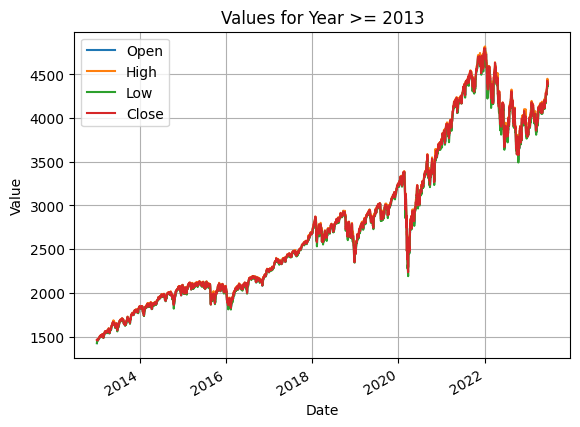

In [6]:
import matplotlib.pyplot as plt

# Filter the DataFrame for year >= 2013
filtered_df = data[data.index.year >= 2013]

# Plot the values
filtered_df.plot(y=['Open', 'High', 'Low', 'Close'], kind='line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Values for Year >= 2013')
plt.grid(True)
plt.legend()
plt.show()